## Machine Learning

In [101]:
# Salaray prediction
import pandas as pd
from sklearn.linear_model import LinearRegression

In [102]:
df = pd.read_csv('data/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [152]:
df.shape

(6698, 6)

In [155]:
df[df.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [138]:
df.dropna(inplace=True, axis=0)
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [139]:
numeric_cols = ["Age", "Years of Experience"]
categorical_cols = ["Gender", "Education Level"]
df_numeric = df[numeric_cols]
df_categorical = df[categorical_cols]
df_numeric.head()

,Age,Years of Experience
0,32.0,5.0
1,28.0,3.0
2,45.0,15.0
3,36.0,7.0
4,52.0,20.0


In [140]:
lr_model = LinearRegression()
X = df[numeric_cols]
Y = df[["Salary"]]

lr_model.fit(X,Y)

LinearRegression()

In [141]:
Y

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
6699,200000.0
6700,50000.0
6701,55000.0
6702,140000.0


In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=17)

In [159]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [160]:
predictions = lr_model.predict(X_test)

In [161]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def calculate_error(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = root_mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4f}")
    return mse, rmse, mae, mape

In [162]:
raw_errors = calculate_error(y_test, predictions)

MSE: 987134670.9738, RMSE: 31418.6994, MAE: 24750.6091, MAPE: 0.3704


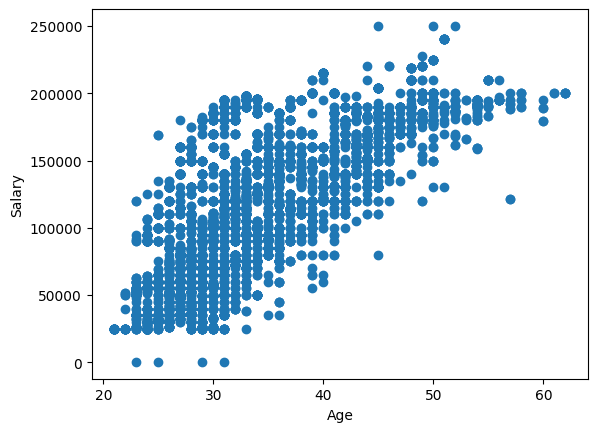

In [150]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

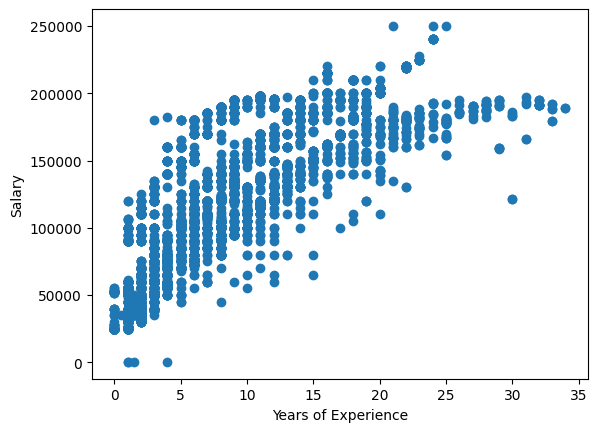

In [151]:
plt.scatter(df['Years of Experience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()